In [1]:
import camelot
import pandas as pd
import matplotlib.pyplot as plt

d:\Kofuku Idea Labs\Fraud Analyzer\fraud_env\Lib\site-packages\pypdf\_crypt_providers\_cryptography.py:32: CryptographyDeprecationWarning: ARC4 has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.ARC4 and will be removed from cryptography.hazmat.primitives.ciphers.algorithms in 48.0.0.
  from cryptography.hazmat.primitives.ciphers.algorithms import AES, ARC4


In [2]:
pdf_path = "Bank Statements/Axis/923010030924818-01-01-2023to18-11-2024bankaxis.pdf"

tables = camelot.read_pdf(pdf_path, flavor='stream', pages='1')

table = tables[1].df

table = table.drop(0)
table = table.drop(2)
table = table.drop(3)
table.head(6)

,0,1,2,3,4,5,6
1,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init.
4,14-10-2024,,TAB923010030924818,,12000.00,12000.00,101
5,,,IMPSP2A430320441735NitinX008776BarodaUtt,,,,
6,29-10-2024,,arPradeshGr,3004.90,,8995.10,512
7,,,IMPSP2A430423024513NitinX008776BarodaUtt,,,,
8,30-10-2024,,arPradeshGr,1105.90,,7889.20,512


In [3]:
def CleanupDF(df, checkrow = 0):
    merged_rows = []
    i = 0
    rows = list(df.iterrows())
    while i < len(rows):
        _, row = rows[i]
        if row[checkrow] == '' and i < len(rows) - 1:
            # Get next row
            _, next_row = rows[i + 1]
            # Create merged row
            nr = pd.Series(index=row.index, dtype='object')
            
            # Check if we need to merge 2 rows ahead
            if next_row[checkrow] == '' and i < len(rows) - 2:
                _, next_next_row = rows[i + 2]
                for cell in range(0,len(row)):
                    nr[cell] = row[cell] + next_row[cell] + next_next_row[cell]
                merged_rows.append(nr)
                i += 3  # Skip next two rows since we merged them
            else:
                # Original case - merge just one row
                for cell in range(0,len(row)):
                    if row[cell] != '' and next_row[cell] != '':
                        nr[cell] = row[cell] + next_row[cell]
                    else:
                        nr[cell] = row[cell] + next_row[cell]
                merged_rows.append(nr)
                i += 2  # Skip next row since we merged it
        else:
            merged_rows.append(row)
            i += 1

    return pd.DataFrame(merged_rows).reset_index(drop=True)

# Use the function
table = CleanupDF(table)

table.head(6)

,0,1,2,3,4,5,6
0,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init.
1,14-10-2024,,TAB923010030924818,,12000.00,12000.00,101
2,29-10-2024,,IMPSP2A430320441735NitinX008776BarodaUttarPrad...,3004.90,,8995.10,512
3,30-10-2024,,IMPSP2A430423024513NitinX008776BarodaUttarPrad...,1105.90,,7889.20,512
4,30-10-2024,,MOBTPFTJITENDRA TADA924010035913597,7800.00,,89.20,512
5,07-11-2024,,BY CASHDEPOSITBNADPRH5197018747071124RAIGAD,,6500.00,6589.20,512


In [4]:
table.columns = table.iloc[0]
table = table[1:]
table.head(6)

,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init.
1,14-10-2024,,TAB923010030924818,,12000.00,12000.00,101
2,29-10-2024,,IMPSP2A430320441735NitinX008776BarodaUttarPrad...,3004.90,,8995.10,512
3,30-10-2024,,IMPSP2A430423024513NitinX008776BarodaUttarPrad...,1105.90,,7889.20,512
4,30-10-2024,,MOBTPFTJITENDRA TADA924010035913597,7800.00,,89.20,512
5,07-11-2024,,BY CASHDEPOSITBNADPRH5197018747071124RAIGAD,,6500.00,6589.20,512
6,07-11-2024,,UPIP2A294614143124NITINKUMARUPIBaroda UP Grami...,5000.00,,1589.20,512


In [33]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Tran Date    131 non-null    object
 1   Chq No       131 non-null    object
 2   Particulars  131 non-null    object
 3   Debit        131 non-null    object
 4   Credit       131 non-null    object
 5   Balance      131 non-null    object
 6   Init.        131 non-null    object
dtypes: object(7)
memory usage: 7.3+ KB


In [8]:
t2 = camelot.read_pdf(pdf_path, flavor='stream', pages='2')
t2 = t2[0].df
t2 = CleanupDF(t2)

In [9]:
# Add empty column between 1st and 2nd column
t2.insert(1, 'Empty', '')


In [12]:
t2.head(5)

,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init.
0,08-11-2024,,ATMCASHAXISDPRH5197018819081124RAIGAD,20000.00,,143087.40,512
1,08-11-2024,,ATMCASHMIDC VARALEVARALE081124,10000.00,,133087.40,512
2,08-11-2024,,ATMCASHMIDC VARALEVARALE081124,10000.00,,123087.40,512
3,08-11-2024,,MOBSELFFT924010039019000924010039019000,5000.00,,118087.40,512
4,08-11-2024,,MOBTD924040104949879SURAJ KUMARBASOR,115000.00,,3087.40,512


In [11]:
t2.columns = table.columns

In [13]:

# Combine table and t2 into a single dataframe
table = pd.concat([table, t2], ignore_index=True)

In [15]:
t3 = camelot.read_pdf(pdf_path, flavor='stream', pages='3')
t3 = t3[0].df
t3 = CleanupDF(t3)

In [17]:
t3.head(5)
t3.insert(1, 'Empty', '')
t3.columns = table.columns


In [19]:
t3.head(5)

,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init.
0,09-11-2024,,NEFTN314243385885393KISHANBARMANHDFC BANKOkk,,6000.00,7268.60,248
1,09-11-2024,,IMPSP2A431411359196KISHANBARemitterOkk91702844...,,1960.00,9228.60,512
2,09-11-2024,,ATMCASHAXISDPRH5197019041091124RAIGAD,7500.00,,1728.60,512
3,09-11-2024,,UPIP2A431439143327AELA SRIState BanNA,,20000.00,21728.60,512
4,09-11-2024,,ATMCASHAXISDPRH5197019045091124RAIGAD,20000.00,,1728.60,512


In [20]:
table = pd.concat([table, t3], ignore_index=True)

In [22]:
t4 = camelot.read_pdf(pdf_path, flavor='stream', pages='4')
t4 = t4[0].df
t4 = CleanupDF(t4)
t4.head(5)
t4.insert(1, 'Empty', '')
t4.columns = table.columns
t4.head(5)

,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init.
0,09-11-2024,,MOBSELFFT924010039019000924010039019000,21000.00,,1555.23,512
1,09-11-2024,,IMPSP2A431416360767KISHANBARemitterOkk91702844...,,30000.00,31555.23,512
2,09-11-2024,,MOBSELFFT924010039019000924010039019000,10000.00,,21555.23,512
3,09-11-2024,,MOBSELFFT924010039019000924010039019000,9999.00,,11556.23,512
4,09-11-2024,,MOBSELFFT924010039019000924010039019000,10000.00,,1556.23,512


In [23]:

table = pd.concat([table, t4], ignore_index=True)

In [25]:
t5 = camelot.read_pdf(pdf_path, flavor='stream', pages='5')
t5 = t5[0].df

In [27]:
t5 = t5[:-2]
t5.head(50)

,0,1,2,3,4,5
0,,UPIP2A229982060333MYADAM VIUnion,,,,
1,10-11-2024,BanPayment,,3000.00,4739.33,512
2,,UPIP2A624289313154CHHOTU,,,,
3,10-11-2024,JATAVUPIHDFC BANK LTD,3400.00,,1339.33,512
4,,MOBSELFFTSURAJ KUMAR,,,,
5,12-11-2024,BAS924010039019000,,1.00,1340.33,4875
6,,UPIP2A468722769137RAMESH KUKotak,,,,
7,16-11-2024,MahSending,,1.00,1341.33,512


In [28]:
t5 = CleanupDF(t5)
t5.insert(1, 'Empty', '')
t5.columns = table.columns
t5.head(10)

,Tran Date,Chq No,Particulars,Debit,Credit,Balance,Init.
0,10-11-2024,,UPIP2A229982060333MYADAM VIUnionBanPayment,,3000.00,4739.33,512
1,10-11-2024,,UPIP2A624289313154CHHOTUJATAVUPIHDFC BANK LTD,3400.00,,1339.33,512
2,12-11-2024,,MOBSELFFTSURAJ KUMARBAS924010039019000,,1.00,1340.33,4875
3,16-11-2024,,UPIP2A468722769137RAMESH KUKotakMahSending,,1.00,1341.33,512


In [29]:

table = pd.concat([table, t5], ignore_index=True)

In [34]:
import os
# Get just the filename without path or extension and append .csv
csv_filename = os.path.basename(pdf_path).rsplit('.', 1)[0] + '.csv'

csv_filename

'923010030924818-01-01-2023to18-11-2024bankaxis.csv'

In [35]:
# Save the DataFrame to CSV in the same directory as the PDF
output_path = os.path.join(os.path.dirname(pdf_path), csv_filename)
table.to_csv(output_path, index=False)

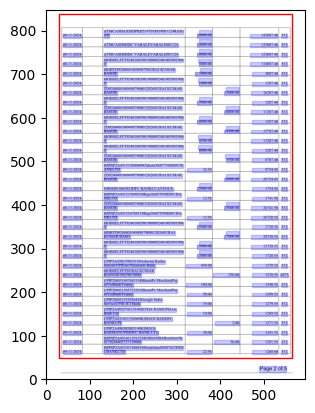

In [7]:
camelot.plot(t2[0], kind='contour')
plt.show()